# Machine Learning 

In [189]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

# import libraries 
import numpy as np
import rasterio
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [229]:
target = 'class'

# Random seed
# The random seed
random_seed = 42

# Set random seed in numpy
np.random.seed(random_seed)

In [230]:
# Load CSV

fp = 'D:/Mongolia_Grassland_Mapping/DATA/Output/South_Trainset_csv.csv'
South_df_full = pd.read_csv(fp)
South_df_full['class'] = South_df_full['class'].astype(int)
South_df_full.head()


,class,fourier_sc10_mean,fourier_sc20_mean,fourier_sc40_mean,fourier_sc200_mean,gabor_sc40_mean,hog_sc10_max,hog_sc40_variance,mean_sc10_mean,mean_sc20_mean,...,lbpm_sc20_max,lbpm_sc40_max,lbpm_sc40_skew,lbpm_sc20_variance,lbpm_sc40_variance,lbpm_sc200_max,orb_sc40_variance,orb_sc40_mean,orb_sc10_kurtosis,orb_sc200_variance
0,9,96.23933,105.637640,114.142330,147.05440,9.106936,0.418301,0.006583,51.077763,24.045124,...,279.05478,918.0,0.000014,1670.0780,18370.182,20233.0,66.389404,5.321429,94.202896,48770.543
1,9,88.98458,106.236176,114.481100,147.15613,8.241679,0.318208,0.005496,47.817627,23.031940,...,268.17386,841.0,0.000016,1520.6335,16031.625,20114.0,65.705680,5.071429,35.202374,49538.080
2,9,82.53443,102.428100,114.470634,145.44202,9.363283,0.350201,0.005849,55.404037,26.486639,...,273.24103,974.0,0.000012,1637.7544,20434.445,20665.0,72.027540,5.142857,66.231570,38358.895
3,9,77.20261,102.937950,113.743110,145.78813,9.091925,0.293436,0.006031,51.737194,25.738033,...,269.80032,962.0,0.000013,1605.2976,19858.182,20547.0,64.266750,5.214286,42407.332000,41214.020
4,9,77.87261,103.605030,111.907740,146.02252,9.133461,0.205067,0.005853,53.020893,24.964030,...,257.70648,905.0,0.000015,1458.1190,17729.690,20498.0,58.950500,5.035714,124.124580,43236.970


In [231]:
South_df_full['class'].unique()

array([9, 2, 6, 1, 7, 3, 8, 4, 5])

In [232]:


# def reclass(row):
#     reclass = row['class']
#     if reclass == 1: return 0
#     if reclass == 2: return 1
#     if reclass == 3: return 2
#     if reclass == 4: return 3
#     if reclass == 5: return 4
#     if reclass == 6: return 5
#     if reclass == 7: return 6
#     if reclass == 8: return 7
#     if reclass == 9: return 8
#     return reclass
# South_df_full['class'] = South_df_full.apply(reclass, axis=1)
# South_df_full['class'] = South_df_full['class'].astype(int)

In [241]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and testing (20%)
df_train, df_test = train_test_split(South_df_full, train_size=0.80, random_state=random_seed, shuffle=True, stratify=South_df_full['class'])

# Reset the index
df_train, df_test = df_train.reset_index(drop=True), df_test.reset_index(drop=True)

# Divide the training data into training (80%) and validation (20%)
df_train, df_val = train_test_split(df_train, train_size=0.9999, random_state=random_seed,)

# Reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

print('df_train', df_train.shape)
print('df_val', df_val.shape)
print('df_test', df_test.shape)

# from sklearn.utils import shuffle
# south_shuffle_df = shuffle(South_df_full)
# south_shuffle_df.shape

df_train (15694, 28)
df_val (2, 28)
df_test (3924, 28)


In [242]:
# south_shuffle_df.shape
# df_train  = south_shuffle_df.iloc[0:19000, :]
# df_test = south_shuffle_df.iloc[1901:, :]

In [243]:
df_train['class'].unique()

array([5, 8, 3, 6, 1, 7, 4, 9, 2])

In [244]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
# X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
# y_val = df_val[target].values
y_test = df_test[target].values

In [245]:
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[   1, 1372],
       [   2,  524],
       [   3, 1400],
       [   4,  740],
       [   5, 2969],
       [   6, 4228],
       [   7, 2972],
       [   8, 1332],
       [   9,  157]], dtype=int64)

In [246]:
(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[   1,  343],
       [   2,  131],
       [   3,  350],
       [   4,  185],
       [   5,  742],
       [   6, 1057],
       [   7,  743],
       [   8,  333],
       [   9,   40]], dtype=int64)

In [247]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [248]:
# Imputer 
from sklearn.impute import SimpleImputer

# si =SimpleImputer(missing_values=0, strategy='mean')

# # Standardize the training data
# X_train = si.fit_transform(X_train)

# # Standardize the validation data
# X_val = si.transform(X_val)

# # Standardize the test data
# X_test = si.transform(X_test)

# The StandardScaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# Standardize the training data
X_train = ss.fit_transform(X_train)

# # Standardize the validation data
# X_val = ss.transform(X_val)

# Standardize the test data
X_test = ss.transform(X_test)

In [249]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

# models = {'lr': LogisticRegression(class_weight='balanced', random_state=random_seed),
#           'mlpc': MLPClassifier(early_stopping=True, random_state=random_seed),
#           'rfc': RandomForestClassifier(class_weight='balanced', random_state=random_seed),
#           'hgbc': HistGradientBoostingClassifier(random_state=random_seed)}

In [250]:
from sklearn.metrics import f1_score
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

pred = rf.predict(X_test)
F1 = f1_score(y_test, pred, average='weighted')
F1

0.5850195936199059

In [251]:
from sklearn.metrics import f1_score
HBG = HistGradientBoostingClassifier()
HBG.fit(X_train, y_train)

pred = HBG.predict(X_test)
F1 = f1_score(y_test, pred, average='weighted')
F1

0.5846702288078264

In [252]:
from sklearn.metrics import f1_score
MLP = MLPClassifier()
MLP.fit(X_train, y_train)

pred = MLP.predict(X_test)
F1 = f1_score(y_test, pred, average='weighted')
F1

c:\Users\mowus\anaconda3\envs\spatial\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.4884915401250589

In [110]:
# Make directory
directory = os.path.dirname('D:/mongolia/mongolia_ml_model/output/submission/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [253]:
# Get the prediction on the test data using the best model
y_test_pred = HBG.predict(X_test)

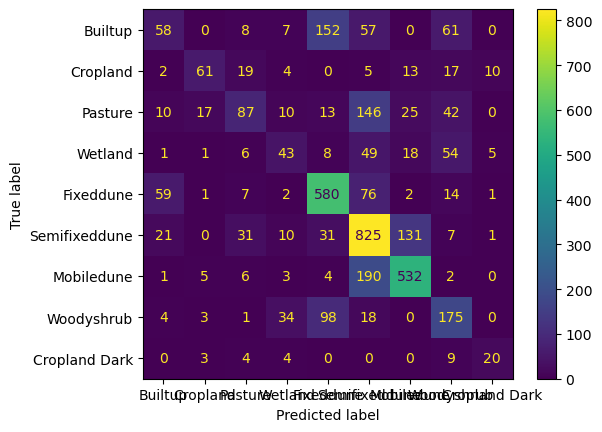

In [254]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# class_names = ['Bultup', 'Cropland', 'Pasture', 'Wetland', 'Fixeddune', 'Semifixeddune',  'Mobiledune','Woodyshrub']
class_names = ['Builtup', 'Cropland', 'Pasture', 'Wetland', 'Fixeddune', 'Semifixeddune',  'Mobiledune','Woodyshrub', 'Cropland Dark']
cmap=sns.color_palette("light:b", as_cmap=True)
cm = confusion_matrix(y_test, y_test_pred, )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels =class_names,)
disp.plot()
# plt.xticks(cm, labels=class_names, rotation='vertical')
plt.show()

In [256]:
from sklearn.metrics import classification_report, confusion_matrix


print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_test_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_test_pred))

=== Confusion Matrix ===
[[ 58   0   8   7 152  57   0  61   0]
 [  2  61  19   4   0   5  13  17  10]
 [ 10  17  87  10  13 146  25  42   0]
 [  1   1   6  43   8  49  18  54   5]
 [ 59   1   7   2 580  76   2  14   1]
 [ 21   0  31  10  31 825 131   7   1]
 [  1   5   6   3   4 190 532   2   0]
 [  4   3   1  34  98  18   0 175   0]
 [  0   3   4   4   0   0   0   9  20]]


=== Classification Report ===
              precision    recall  f1-score   support

           1       0.37      0.17      0.23       343
           2       0.67      0.47      0.55       131
           3       0.51      0.25      0.34       350
           4       0.37      0.23      0.28       185
           5       0.65      0.78      0.71       742
           6       0.60      0.78      0.68      1057
           7       0.74      0.72      0.73       743
           8       0.46      0.53      0.49       333
           9       0.54      0.50      0.52        40

    accuracy                           0.61      

In [ ]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Inference 

In [206]:
# Load stacked data VRT 
PATH= f'D:/Mongolia_Grassland_Mapping/DATA/Output/SouthClip.tif'

img = rasterio.open(PATH)
SouthRaster_array = img.read()
print(SouthRaster_array.shape)

# Process spfea features, get the width, height and number of bands
n = SouthRaster_array.shape[0]
print (n) # number of bands
h = SouthRaster_array.shape[1]
print (h) # height
w = SouthRaster_array.shape[2]
print (w) # width

(27, 1905, 2489)
27
1905
2489


In [207]:
# Make dataframe
bandname = ['fourier_sc10_mean', 'fourier_sc20_mean', 'fourier_sc40_mean', 'fourier_sc200_mean', 'gabor_sc40_mean', 'hog_sc10_max', 'hog_sc40_variance', 'mean_sc10_mean', 'mean_sc20_mean', 'mean_sc20_variance', 'mean_sc40_variance', 'lsr_sc40_line_length', 'lsr_sc40_line_mean', 'lsr_sc200_line_mean', 'lbpm_sc10_kurtosis', 'lbpm_sc20_kurtosis', 'lbpm_sc10_max', 'lbpm_sc20_max', 'lbpm_sc40_max', 'lbpm_sc40_skew', 'lbpm_sc20_variance', 'lbpm_sc40_variance', 'lbpm_sc200_max', 'orb_sc40_variance', 'orb_sc40_mean', 'orb_sc10_kurtosis', 'orb_sc200_variance']

# Convert South boundary to Pandas Dataframe

South_Data_Array = SouthRaster_array[:, SouthRaster_array[0,...]!=-999]
South_Data_Array= np.transpose(South_Data_Array)
South_Data_df = pd.DataFrame(South_Data_Array, columns=bandname)
print(South_Data_df.shape)


South_Data_df['uid'] = np.arange(start=0,stop = len(South_Data_df), dtype=int)
print(South_Data_df.shape)
South_Data_df.head()

(4741545, 27)
(4741545, 28)


,fourier_sc10_mean,fourier_sc20_mean,fourier_sc40_mean,fourier_sc200_mean,gabor_sc40_mean,hog_sc10_max,hog_sc40_variance,mean_sc10_mean,mean_sc20_mean,mean_sc20_variance,...,lbpm_sc40_max,lbpm_sc40_skew,lbpm_sc20_variance,lbpm_sc40_variance,lbpm_sc200_max,orb_sc40_variance,orb_sc40_mean,orb_sc10_kurtosis,orb_sc200_variance,uid
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,1
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,2
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,3
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,4


In [208]:
# Handling missing data

## Check and count for NaN values by column in the table
if South_Data_df.isnull().any().any():
    for colomn in list(South_Data_df.columns.values):
        if South_Data_df[colomn].isnull().any():
            print ("Column '"+str(colomn)+"' have "+str(South_Data_df[colomn].isnull().sum())+" NULL values")
else: print ("No missing values in dataframe") 
        
## Check and count for Inf values by column in the table
if np.isinf(South_Data_df).any().any():
    for colomn in list(South_Data_df.columns.values):
        if np.isinf(South_Data_df[colomn]).any():
            print ("Column '"+str(colomn)+"' have "+str(np.isinf(South_Data_df[colomn]).sum())+" Infinite values")
else: print ("No infinite values in dataframe") 

No missing values in dataframe
No infinite values in dataframe


In [209]:
South_Data_df['orb_sc40_mean'] = South_Data_df['orb_sc40_mean'].fillna(value=0)
South_data_X = South_Data_df.loc[ South_Data_df['orb_sc40_mean'] != -9999 ]
# South_data_X = South_Data_df.loc[ South_Data_df['orb_sc40_mean'] != 0 ]
data_uid = South_data_X
data_x  = South_data_X.drop(columns=['uid'])

data_uid['catid'] = np.arange(start=0,stop = len(data_uid), dtype=int)

C:\Users\mowus\AppData\Local\Temp\ipykernel_5048\3836757317.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_uid['catid'] = np.arange(start=0,stop = len(data_uid), dtype=int)


In [210]:
pca = decomposition.PCA(n_components=3)
data_x = pca.fit_transform(data_x)

In [211]:
from sklearn.impute import SimpleImputer
# The SimpleImputer
# si = SimpleImputer(missing_values=0, strategy='mean')
# data_x_tran = si.fit_transform(data_x)

# # Standardize Testing data
# data_x_scale = ss.fit_transform(data_x_tran)

data_x_scale = ss.fit_transform(data_x)

In [212]:
# PREDICTION 
pred_map = HBG.predict(data_x_scale)

In [213]:
# Convert narray to dataframe
col_name = ['pred']
predictions_image = pd.DataFrame(pred_map, columns=col_name)
predictions_image['catid'] = np.arange(start=0,stop = len(predictions_image), dtype=int) # add a uniques id to merge
print(predictions_image.shape)
predictions_image.head()

(3214403, 2)


,pred,catid
0,5,0
1,5,1
2,5,2
3,5,3
4,1,4


In [214]:
# def reclass(row):
#     reclass = row['pred']
#     if reclass == 0: return 1
#     if reclass == 1: return 2
#     if reclass == 2: return 3
#     if reclass == 3: return 4
#     if reclass == 4: return 5
#     if reclass == 5: return 6
#     if reclass == 6: return 7
#     if reclass == 7: return 8
#     if reclass == 8: return 9
#     return reclass
# predictions_image['pred'] = predictions_image.apply(reclass, axis=1)

In [215]:
# merge prediction to data_x (data with useful info)
map_data = predictions_image.merge(data_uid, how='inner', on='catid')
# map_data = pd.concat([predictions_image, data_x], axis=1 )
print (map_data.shape)
#
# set index for merging with big image data
map_data  = map_data.set_index('uid')
df1  = South_Data_df.set_index('uid')

(3214403, 30)


In [216]:
# merge to bg image data
predictions_image_merge = pd.merge(df1, map_data, how='outer', right_index=True, left_index=True)

predictions_image = predictions_image_merge['pred'].values

print(predictions_image.shape)

(4741545,)


In [217]:
(unique, counts) = np.unique(predictions_image, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[1.000000e+00, 2.107120e+05],
       [2.000000e+00, 1.936810e+05],
       [3.000000e+00, 8.520500e+05],
       [4.000000e+00, 1.072450e+05],
       [5.000000e+00, 5.420420e+05],
       [6.000000e+00, 6.745150e+05],
       [7.000000e+00, 4.756680e+05],
       [8.000000e+00, 1.251120e+05],
       [9.000000e+00, 3.337800e+04],
       [         nan, 1.527142e+06]])

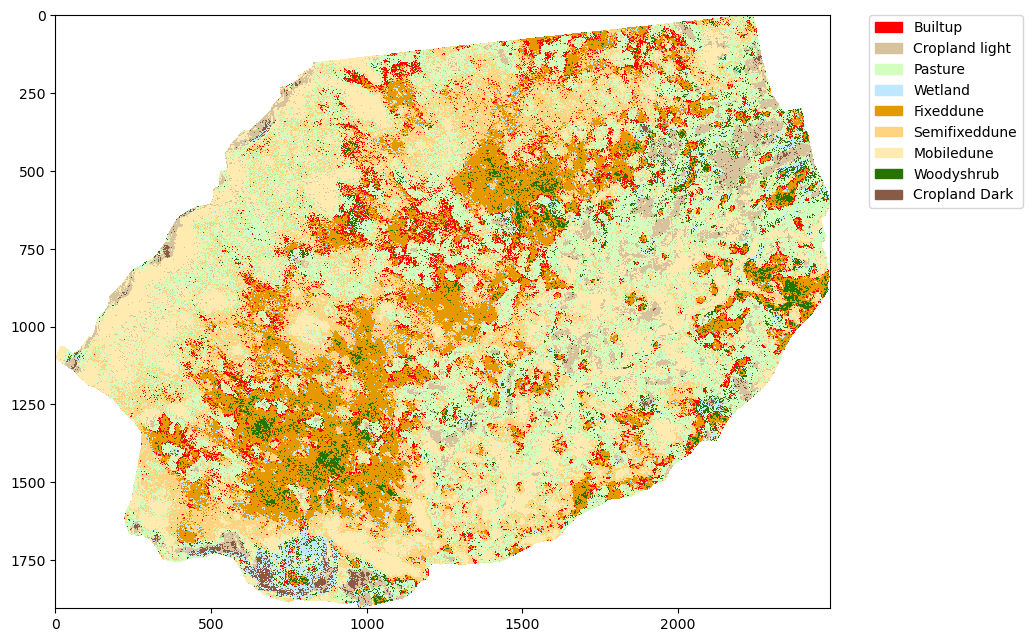

In [218]:
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
from matplotlib import colors
pred_map = predictions_image.reshape(h, w)


values = np.unique(pred_map.ravel())

# plt.figure(figsize=(8,4))
fig, ax = plt.subplots(figsize= (10,10),sharey=True)
cmap = colors.ListedColormap(['#FF0000', '#D7C29E', '#D3FFBE', '#BEE8FF', '#E69800', '#FFD37F', '#FFEBAF', '#267300', '#895A44'])
# ['#FF0000', '#D7C29E', '#D3FFBE', '#BEE8FF', '#E69800', '#FFD37F', '#FFEBAF', '#267300', '#895A44']
im = plt.imshow(pred_map, interpolation='none', cmap=cmap)

# get the colors of the values, according to the 
# colormap used by imshow
colors = [ im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=colors[i], label="Class {l}".format(l=values[i]) ) for i in range(len(values)) ]

labels = ['Builtup', 'Cropland light', 'Pasture', 'Wetland', 'Fixeddune', 'Semifixeddune',  'Mobiledune','Woodyshrub', 'Cropland Dark']
# ax.set_xticklabels(labels)
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=labels )

plt.show()

In [187]:
# Creating the directory for the cv results produced by GridSearchCV
# Make directory
directory = os.path.dirname('D:/mongolia/mongolia_ml_model/output/mgl_map')
if not os.path.exists(directory):
    os.makedirs(directory)

In [188]:
import datetime

T = datetime.datetime.now()
time = T.strftime("%y%m%d%H%M%S")

filename = 'south_subset27_F'
out_file = f"{directory}/{filename}_{time}.tif"
# out_file = "/home/ubuntu/max/output/lag_lgb_map.tif"
# update profile from red band
fp = f'D:/Mongolia_Grassland_Mapping/reference/south_band.tif'
with rasterio.open(fp, mode="r") as src:
    out_profile = src.profile.copy()
    out_profile.update(count=1,
                       nodata=-9999,
                       dtype='float32',
                       width=src.width,
                       height=src.height,
                       crs=src.crs)

# open in 'write' mode, unpack profile info to dst
with rasterio.open(out_file,
                   'w', **out_profile) as dst:
    dst.write_band(1, pred_map)

# North

In [258]:
# Load CSV

fp = 'D:/Mongolia_Grassland_Mapping/DATA/Output/North_Trainset_csv.csv'
north_df_full = pd.read_csv(fp)
north_df_full['class'] = north_df_full['class'].astype(int)
north_df_full.head()


,class,fourier_sc10_mean,fourier_sc20_mean,fourier_sc40_mean,fourier_sc200_mean,gabor_sc40_mean,hog_sc10_max,hog_sc40_variance,mean_sc10_mean,mean_sc20_mean,...,lbpm_sc20_max,lbpm_sc40_max,lbpm_sc40_skew,lbpm_sc20_variance,lbpm_sc40_variance,lbpm_sc200_max,orb_sc40_variance,orb_sc40_mean,orb_sc10_kurtosis,orb_sc200_variance
0,3,81.725685,96.840370,108.19399,141.34845,12.997427,0.146456,0.000266,69.196396,37.633310,...,235.90065,943.0,0.000013,1301.4429,19795.492,23607.0,12.878222,1.964286,243.929900,9864.373
1,3,82.015500,93.924286,107.19500,141.45879,13.201386,0.158466,0.000214,69.540340,38.221970,...,243.27042,970.0,0.000012,1380.4261,21000.117,23673.0,3.325301,1.000000,1239.652600,9710.193
2,3,81.518135,96.413666,106.99562,141.55563,13.183279,0.162178,0.000462,74.101670,38.703370,...,228.13885,962.0,0.000012,1169.0620,20772.871,23453.0,7.822732,1.357143,5055.773400,10177.445
3,3,86.185370,103.499970,112.51620,144.32559,9.925531,0.172212,0.000378,56.981550,28.771599,...,229.72691,865.0,0.000017,1172.6641,16288.509,20960.0,71.022804,5.535714,50.791344,38845.363
4,3,85.347275,103.322500,114.25055,144.36385,9.422665,0.222240,0.000373,60.429670,28.618086,...,228.99623,875.0,0.000016,1129.1064,16537.164,20878.0,64.385960,5.107143,142.241710,39326.332


In [259]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and testing (20%)
df_train, df_test = train_test_split(South_df_full, train_size=0.80, random_state=random_seed, shuffle=True, stratify=South_df_full['class'])

# Reset the index
df_train, df_test = df_train.reset_index(drop=True), df_test.reset_index(drop=True)

# Divide the training data into training (80%) and validation (20%)
df_train, df_val = train_test_split(df_train, train_size=0.9999, random_state=random_seed,)

# Reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

print('df_train', df_train.shape)
print('df_val', df_val.shape)
print('df_test', df_test.shape)

# from sklearn.utils import shuffle
# north_shuffle_df = shuffle(north_df_full)
# north_shuffle_df.shape

df_train (15694, 28)
df_val (2, 28)
df_test (3924, 28)


In [260]:
# # south_shuffle_df.shape
# df_train  = north_shuffle_df.iloc[0:3000, :]
# df_test = north_shuffle_df.iloc[3001:, :]

In [261]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_test = df_test[target].values

In [262]:
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[   1, 1372],
       [   2,  524],
       [   3, 1400],
       [   4,  740],
       [   5, 2969],
       [   6, 4228],
       [   7, 2972],
       [   8, 1332],
       [   9,  157]], dtype=int64)

In [263]:
(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[   1,  343],
       [   2,  131],
       [   3,  350],
       [   4,  185],
       [   5,  742],
       [   6, 1057],
       [   7,  743],
       [   8,  333],
       [   9,   40]], dtype=int64)

In [264]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [265]:
# The StandardScaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the test data
X_test = ss.transform(X_test)

In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier


In [267]:
from sklearn.metrics import f1_score
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

pred = rf.predict(X_test)
F1 = f1_score(y_test, pred, average='weighted')
F1

0.581835614116168

In [268]:
from sklearn.metrics import f1_score
HBG = HistGradientBoostingClassifier()
HBG.fit(X_train, y_train)

pred = HBG.predict(X_test)
F1 = f1_score(y_test, pred, average='weighted')
F1

0.589026254622735

In [269]:
from sklearn.metrics import f1_score
MLP = MLPClassifier()
MLP.fit(X_train, y_train)

pred = MLP.predict(X_test)
F1 = f1_score(y_test, pred, average='weighted')
F1

c:\Users\mowus\anaconda3\envs\spatial\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.48849284857517455

In [270]:
# Get the prediction on the test data using the best model
y_test_pred = HBG.predict(X_test)

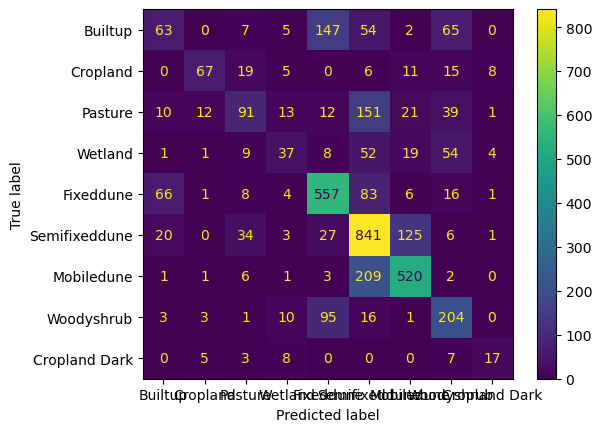

In [271]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# class_names = ['Bultup', 'Cropland', 'Pasture', 'Wetland', 'Fixeddune', 'Semifixeddune',  'Mobiledune','Woodyshrub']
class_names = ['Builtup', 'Cropland', 'Pasture', 'Wetland', 'Fixeddune', 'Semifixeddune',  'Mobiledune','Woodyshrub', 'Cropland Dark']
cmap=sns.color_palette("light:b", as_cmap=True)
cm = confusion_matrix(y_test, y_test_pred, )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels =class_names,)
disp.plot()
# plt.xticks(cm, labels=class_names, rotation='vertical')
plt.show()

In [272]:
from sklearn.metrics import classification_report, confusion_matrix


print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_test_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_test_pred))

=== Confusion Matrix ===
[[ 63   0   7   5 147  54   2  65   0]
 [  0  67  19   5   0   6  11  15   8]
 [ 10  12  91  13  12 151  21  39   1]
 [  1   1   9  37   8  52  19  54   4]
 [ 66   1   8   4 557  83   6  16   1]
 [ 20   0  34   3  27 841 125   6   1]
 [  1   1   6   1   3 209 520   2   0]
 [  3   3   1  10  95  16   1 204   0]
 [  0   5   3   8   0   0   0   7  17]]


=== Classification Report ===
              precision    recall  f1-score   support

           1       0.38      0.18      0.25       343
           2       0.74      0.51      0.61       131
           3       0.51      0.26      0.34       350
           4       0.43      0.20      0.27       185
           5       0.66      0.75      0.70       742
           6       0.60      0.80      0.68      1057
           7       0.74      0.70      0.72       743
           8       0.50      0.61      0.55       333
           9       0.53      0.42      0.47        40

    accuracy                           0.61      

## Inference

In [133]:
# Load stacked data VRT 
PATH= f'D:/Mongolia_Grassland_Mapping/DATA/Output/NorthClip.tif'

img = rasterio.open(PATH)
NorthRaster_array = img.read()
print(SouthRaster_array.shape)

# Process spfea features, get the width, height and number of bands
n = NorthRaster_array.shape[0]
print (n) # number of bands
h = NorthRaster_array.shape[1]
print (h) # height
w = NorthRaster_array.shape[2]
print (w) # width

(27, 1905, 2489)
27
628
1409


In [134]:
# Make dataframe
bandname = ['fourier_sc10_mean', 'fourier_sc20_mean', 'fourier_sc40_mean', 'fourier_sc200_mean', 'gabor_sc40_mean', 'hog_sc10_max', 'hog_sc40_variance', 'mean_sc10_mean', 'mean_sc20_mean', 'mean_sc20_variance', 'mean_sc40_variance', 'lsr_sc40_line_length', 'lsr_sc40_line_mean', 'lsr_sc200_line_mean', 'lbpm_sc10_kurtosis', 'lbpm_sc20_kurtosis', 'lbpm_sc10_max', 'lbpm_sc20_max', 'lbpm_sc40_max', 'lbpm_sc40_skew', 'lbpm_sc20_variance', 'lbpm_sc40_variance', 'lbpm_sc200_max', 'orb_sc40_variance', 'orb_sc40_mean', 'orb_sc10_kurtosis', 'orb_sc200_variance']

# Convert South boundary to Pandas Dataframe

North_Data_Array = NorthRaster_array[:, NorthRaster_array[0,...]!=-999]
North_Data_Array= np.transpose(North_Data_Array)
North_Data_df = pd.DataFrame(North_Data_Array, columns=bandname)
print(North_Data_df.shape)


North_Data_df['uid'] = np.arange(start=0,stop = len(North_Data_df), dtype=int)
print(North_Data_df.shape)
North_Data_df.head()

(884852, 27)
(884852, 28)


,fourier_sc10_mean,fourier_sc20_mean,fourier_sc40_mean,fourier_sc200_mean,gabor_sc40_mean,hog_sc10_max,hog_sc40_variance,mean_sc10_mean,mean_sc20_mean,mean_sc20_variance,...,lbpm_sc40_max,lbpm_sc40_skew,lbpm_sc20_variance,lbpm_sc40_variance,lbpm_sc200_max,orb_sc40_variance,orb_sc40_mean,orb_sc10_kurtosis,orb_sc200_variance,uid
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,1
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,2
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,3
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,4


In [135]:
North_Data_df['orb_sc40_mean'] = North_Data_df['orb_sc40_mean'].fillna(value=0)
North_data_X = North_Data_df.loc[ North_Data_df['orb_sc40_mean'] != -9999 ]
# South_data_X = South_Data_df.loc[ South_Data_df['orb_sc40_mean'] != 0 ]
data_uid = North_data_X
data_x  = North_data_X.drop(columns=['uid'])

data_uid['catid'] = np.arange(start=0,stop = len(data_uid), dtype=int)

C:\Users\mowus\AppData\Local\Temp\ipykernel_5048\565062042.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_uid['catid'] = np.arange(start=0,stop = len(data_uid), dtype=int)


In [137]:
pca = decomposition.PCA(n_components=3)
data_x = pca.fit_transform(data_x)

In [138]:
from sklearn.impute import SimpleImputer
# The SimpleImputer
# si = SimpleImputer(missing_values=0, strategy='mean')
# data_x_tran = si.fit_transform(data_x)

# # Standardize Testing data
# data_x_scale = ss.fit_transform(data_x_tran)

data_x_scale = ss.fit_transform(data_x)

In [139]:
# PREDICTION 
pred_map = MLP.predict(data_x_scale)

In [140]:
# Convert narray to dataframe
col_name = ['pred']
predictions_image = pd.DataFrame(pred_map, columns=col_name)
predictions_image['catid'] = np.arange(start=0,stop = len(predictions_image), dtype=int) # add a uniques id to merge
print(predictions_image.shape)
predictions_image.head()

(504263, 2)


,pred,catid
0,6,0
1,6,1
2,6,2
3,6,3
4,6,4


In [141]:
# merge prediction to data_x (data with useful info)
map_data = predictions_image.merge(data_uid, how='inner', on='catid')
# map_data = pd.concat([predictions_image, data_x], axis=1 )
print (map_data.shape)
#
# set index for merging with big image data
map_data  = map_data.set_index('uid')
df1  = North_Data_df.set_index('uid')

(504263, 30)


In [142]:
# merge to bg image data
predictions_image_merge = pd.merge(df1, map_data, how='outer', right_index=True, left_index=True)

predictions_image = predictions_image_merge['pred'].values

print(predictions_image.shape)

(884852,)


In [143]:
(unique, counts) = np.unique(predictions_image, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[1.00000e+00, 1.48060e+04],
       [3.00000e+00, 1.67610e+04],
       [5.00000e+00, 1.59199e+05],
       [6.00000e+00, 1.83183e+05],
       [7.00000e+00, 1.29949e+05],
       [9.00000e+00, 3.65000e+02],
       [        nan, 3.80589e+05]])

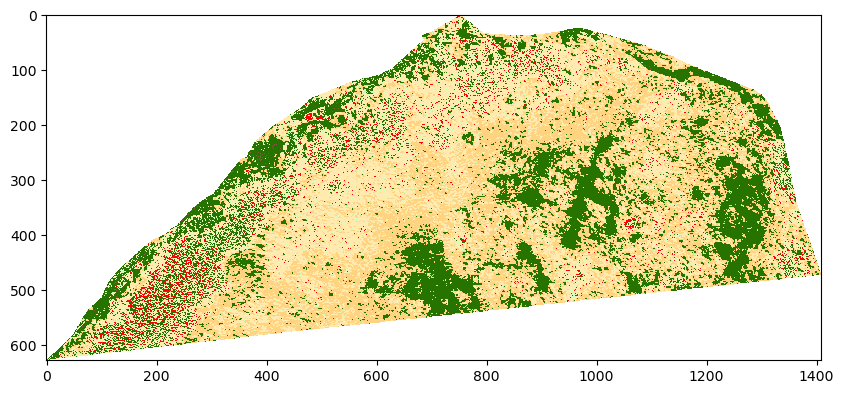

In [144]:
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
from matplotlib import colors
pred_map = predictions_image.reshape(h, w)


values = np.unique(pred_map.ravel())

# plt.figure(figsize=(8,4))
fig, ax = plt.subplots(figsize= (10,10),sharey=True)
cmap = colors.ListedColormap(['#FF0000', '#D7C29E', '#D3FFBE', '#E69800', '#FFD37F', '#FFEBAF', '#267300', '#895A44'])
# ['#FF0000', '#D7C29E', '#D3FFBE', '#BEE8FF', '#E69800', '#FFD37F', '#FFEBAF', '#267300', '#895A44']
im = plt.imshow(pred_map, interpolation='none', cmap=cmap)

# get the colors of the values, according to the 
# colormap used by imshow
colors = [ im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=colors[i], label="Class {l}".format(l=values[i]) ) for i in range(len(values)) ]

# labels = classes = ['Builtup', 'Cropland', 'Pasture', 'Fixeddune', 'Semifixeddune',  'Mobiledune','Woodyshrub', 'Cropland Dark']
# ax.set_xticklabels(labels)
# put those patched as legend-handles into the legend
# plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=labels )

plt.show()

In [146]:
import datetime

T = datetime.datetime.now()
time = T.strftime("%y%m%d%H%M%S")

filename = 'North_subset27'
out_file = f"{directory}/{filename}_{time}.tif"
# out_file = "/home/ubuntu/max/output/lag_lgb_map.tif"
# update profile from red band
fp = f'D:/Mongolia_Grassland_Mapping/reference/north_band.tif'
with rasterio.open(fp, mode="r") as src:
    out_profile = src.profile.copy()
    out_profile.update(count=1,
                       nodata=-9999,
                       dtype='float32',
                       width=src.width,
                       height=src.height,
                       crs=src.crs)

# open in 'write' mode, unpack profile info to dst
with rasterio.open(out_file,
                   'w', **out_profile) as dst:
    dst.write_band(1, pred_map)